# The Block Matching

The Block Matching block estimates motion between two images or two video frames by comparing blocks of pixels. 

The provided code employs OpenCV's StereoBM algorithm to generate a depth map from a pair of stereo images. The result will be a window showing the disparity map.

The disparity map showcases the pixel coordinate discrepancies between the left and right images. Areas with darker shades signify objects situat
ed farther away, whereas lighter areas indicate objects that are closer in proximity.

**Why we need two images?** 

In stereo vision, two images are used because they provide different perspectives of the same scene, much like how our left and right eyes perceive depth. This allows the system to triangulate and estimate the 3D positions of objects in the scene.

- **Depth Perception**: By comparing the differences between corresponding points in the left and right images, a system can estimate the depth or distance of objects in the scene.

- **Triangulation**: When you have two images and the corresponding points in each image, you can use triangulation techniques to calculate the 3D coordinates of points in the scene.


In [154]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt


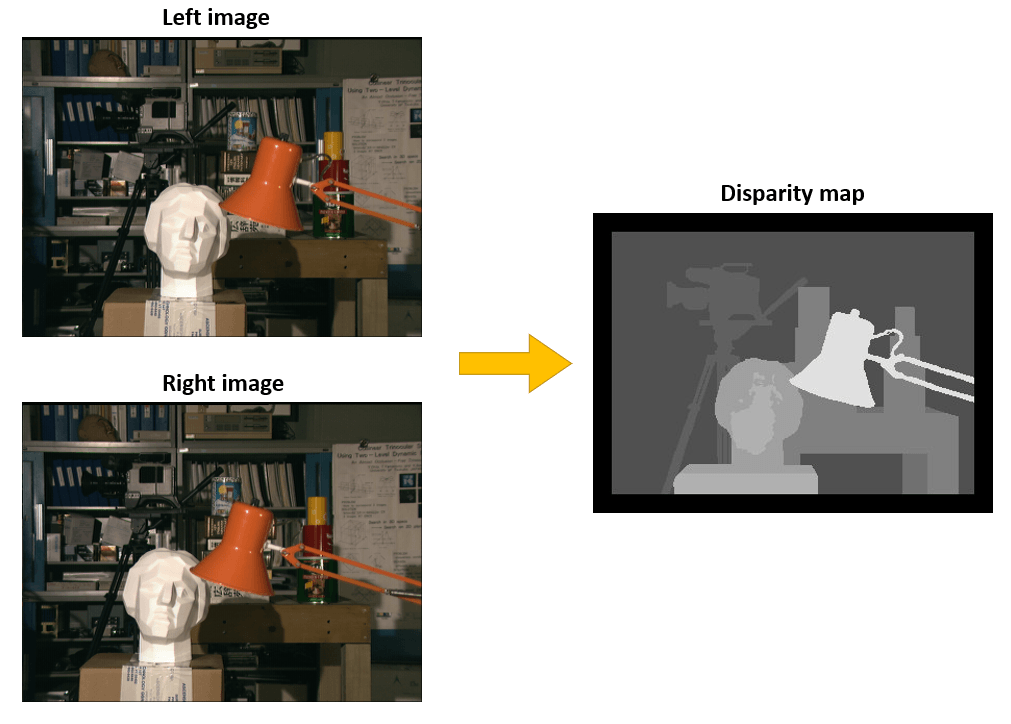

In [155]:
image_path = r'C:\Users\yarry\Desktop\Summer 2023\MIA phase 1 tasks\phase 2\task8\part2\fig1.webp'
img = Image.open(image_path)
img


In [173]:

# Load left and right stereo images
left_image = cv2.cvtColor(cv2.imread('left_image.png'), cv2.COLOR_BGR2GRAY)  # Load in grayscale
right_image = cv2.cvtColor(cv2.imread('right_image.png'), cv2.COLOR_BGR2GRAY) 




In [190]:


print("Left Image Shape:", left_image.shape)
print("Right Image Shape:", right_image.shape)
left_image_cropped = left_image[:212, :290]
print("Left Image Shape:", left_image_cropped.shape)


Left Image Shape: (217, 291)
Right Image Shape: (212, 290)
Left Image Shape: (212, 290)


In [207]:
stereo = cv2.StereoSGBM_create(minDisparity=0, numDisparities=15, blockSize=15)

# Compute disparity map

disparity = stereo.compute(left_image_cropped, right_image)

# Normalize the disparity map for display
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

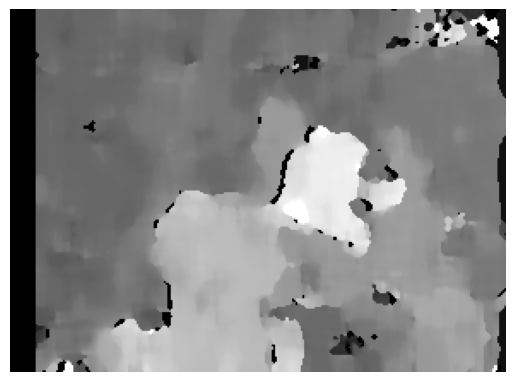

In [208]:
# Display the disparity map
plt.imshow(disparity_normalized, cmap='gray')
plt.axis('off')
plt.show()

**minDisparity**: This parameter represents the smallest possible disparity value that will be considered during the disparity estimation process. Disparity refers to the shift in pixel coordinates between corresponding points in the left and right stereo images.
 
**numDisparities**: This parameter specifies the range of disparities to be considered. It represents the maximum disparity minus the minimum disparity.

**blockSize**: This parameter defines the size of the window used for matching pixels between the left and right images. 
